In [71]:
import os
cwd = os.getcwd()
cwd

'/home/hannesr/dev/slo/cassandra-strict-slo/data_analysis'

In [72]:
RESULTS_DIR = "../results"

In [73]:
import os
for file in os.listdir(RESULTS_DIR):
    if file.startswith("mixload_1000000ops") and file.endswith("Client1"):
        print(file)

mixload_1000000ops_0_Client1
mixload_1000000ops_10_Client1
mixload_1000000ops_1_Client1
mixload_1000000ops_20_Client1
mixload_1000000ops_30_Client1
mixload_1000000ops_40_Client1
mixload_1000000ops_5_Client1


In [74]:
mixload_files = list(map(lambda file: RESULTS_DIR + "/" + file,
                    filter(lambda file: 
                       file.startswith("mixload_1000000ops") and file.endswith("Client1"),
                       os.listdir(RESULTS_DIR)
                    )))
mixload_files

['../results/mixload_1000000ops_0_Client1',
 '../results/mixload_1000000ops_10_Client1',
 '../results/mixload_1000000ops_1_Client1',
 '../results/mixload_1000000ops_20_Client1',
 '../results/mixload_1000000ops_30_Client1',
 '../results/mixload_1000000ops_40_Client1',
 '../results/mixload_1000000ops_5_Client1']

In [75]:
def get_percentiles(filename):
    file = open(filename, "r")
    lines = list(map(lambda line: line.rstrip('\n'), file.readlines()))

    # Remove everything before "Starting test"
    def get_line_with_find(lines, regex):
        for index, line in enumerate(lines):
            if line.find(regex) != -1:
                return index
        return -1

    test_index = get_line_with_find(lines, 'Starting test.')

    full_test = lines[test_index + 1:]
    
    read_test_lines = list(
        filter(lambda line: line.find("[READ]") != -1, 
        filter(lambda line: line.find("Percentile") != -1, full_test)
    ))

    def get_tuple_from_line(line):
        parts = line.split(",")
        
        percentile_string = parts[1].strip()
        percentile = percentile_string.split("Percentile")[0].replace("th", "")
        percentile = float(percentile)
        
        latency_string = parts[2].strip()
        latency = int(latency_string)
        
        return percentile, latency
    
    return list(map(get_tuple_from_line, read_test_lines))
    
#     print(get_tuple_from_line(read_test_lines[0]))
#     for line in read_test_lines:
#         print(line)
    
    
get_percentiles(mixload_files[0])

[(10.0, 1423),
 (20.0, 1785),
 (30.0, 2173),
 (40.0, 2611),
 (50.0, 3083),
 (60.0, 3603),
 (70.0, 4151),
 (80.0, 4859),
 (90.0, 6215),
 (95.0, 8223),
 (96.0, 9039),
 (97.0, 10239),
 (98.0, 11991),
 (99.0, 15831),
 (99.1, 16479),
 (99.2, 17231),
 (99.3, 18063),
 (99.4, 19151),
 (99.5, 20335),
 (99.6, 21999),
 (99.7, 24255),
 (99.8, 28335),
 (99.85, 31519),
 (99.89, 35487),
 (99.9, 36735)]

In [76]:
def get_cdf_for_file(filename):
    threshold = filename.split("1000000ops_")[1].split("_")[0]
    return threshold, get_percentiles(filename)
    
get_cdf_for_file(mixload_files[0])

('0',
 [(10.0, 1423),
  (20.0, 1785),
  (30.0, 2173),
  (40.0, 2611),
  (50.0, 3083),
  (60.0, 3603),
  (70.0, 4151),
  (80.0, 4859),
  (90.0, 6215),
  (95.0, 8223),
  (96.0, 9039),
  (97.0, 10239),
  (98.0, 11991),
  (99.0, 15831),
  (99.1, 16479),
  (99.2, 17231),
  (99.3, 18063),
  (99.4, 19151),
  (99.5, 20335),
  (99.6, 21999),
  (99.7, 24255),
  (99.8, 28335),
  (99.85, 31519),
  (99.89, 35487),
  (99.9, 36735)])

In [77]:
cdfs = list(map(get_cdf_for_file, mixload_files))
cdfs

[('0',
  [(10.0, 1423),
   (20.0, 1785),
   (30.0, 2173),
   (40.0, 2611),
   (50.0, 3083),
   (60.0, 3603),
   (70.0, 4151),
   (80.0, 4859),
   (90.0, 6215),
   (95.0, 8223),
   (96.0, 9039),
   (97.0, 10239),
   (98.0, 11991),
   (99.0, 15831),
   (99.1, 16479),
   (99.2, 17231),
   (99.3, 18063),
   (99.4, 19151),
   (99.5, 20335),
   (99.6, 21999),
   (99.7, 24255),
   (99.8, 28335),
   (99.85, 31519),
   (99.89, 35487),
   (99.9, 36735)]),
 ('10',
  [(10.0, 1430),
   (20.0, 1817),
   (30.0, 2191),
   (40.0, 2605),
   (50.0, 3031),
   (60.0, 3483),
   (70.0, 3977),
   (80.0, 4683),
   (90.0, 6007),
   (95.0, 7843),
   (96.0, 8607),
   (97.0, 9583),
   (98.0, 11071),
   (99.0, 13823),
   (99.1, 14327),
   (99.2, 14919),
   (99.3, 15655),
   (99.4, 16495),
   (99.5, 17503),
   (99.6, 18639),
   (99.7, 20463),
   (99.8, 23311),
   (99.85, 25135),
   (99.89, 27599),
   (99.9, 28495)]),
 ('1',
  [(10.0, 1432),
   (20.0, 1827),
   (30.0, 2193),
   (40.0, 2541),
   (50.0, 2927),
   (60.0

In [78]:
from matplotlib import pyplot as plt

In [79]:
%matplotlib notebook

In [80]:
def get_cdfs_y(i):
    y = []
    lol = cdfs[i]
    for x in lol[1]:
        y.append(x[1])
    return y
i = 0
lol = cdfs[0]
x_axis = []
for x in lol[1]:
    x_axis.append(x[0])
print(x_axis)
y_0 = []
y_0 = get_cdfs_y(0)
print(y_0)
y_10 = get_cdfs_y(1)
print(y_10)
y_1 = get_cdfs_y(2)
print(y_1)
y_20 = get_cdfs_y(3)
print(y_20) 
y_30 = get_cdfs_y(4)
print(y_30)
y_40 = get_cdfs_y(5)
print(y_40)
y_5 = get_cdfs_y(6)
print(y_5)

[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 96.0, 97.0, 98.0, 99.0, 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.85, 99.89, 99.9]
[1423, 1785, 2173, 2611, 3083, 3603, 4151, 4859, 6215, 8223, 9039, 10239, 11991, 15831, 16479, 17231, 18063, 19151, 20335, 21999, 24255, 28335, 31519, 35487, 36735]
[1430, 1817, 2191, 2605, 3031, 3483, 3977, 4683, 6007, 7843, 8607, 9583, 11071, 13823, 14327, 14919, 15655, 16495, 17503, 18639, 20463, 23311, 25135, 27599, 28495]
[1432, 1827, 2193, 2541, 2927, 3379, 3883, 4611, 5991, 7831, 8479, 9431, 10911, 13655, 14175, 14759, 15535, 16479, 17599, 19039, 20991, 23919, 26031, 28607, 29327]
[1350, 1667, 1999, 2373, 2819, 3343, 3887, 4519, 5735, 7503, 8223, 9247, 10583, 13023, 13471, 14039, 14719, 15559, 16607, 17903, 19679, 22431, 24079, 25999, 26655]
[1462, 1806, 2145, 2501, 2879, 3323, 3853, 4531, 5979, 8031, 8751, 9679, 11063, 13647, 14135, 14695, 15431, 16255, 17263, 18655, 20767, 23807, 25951, 28415, 29279]
[1472, 1824, 2155, 2477, 2

<IPython.core.display.Javascript object>


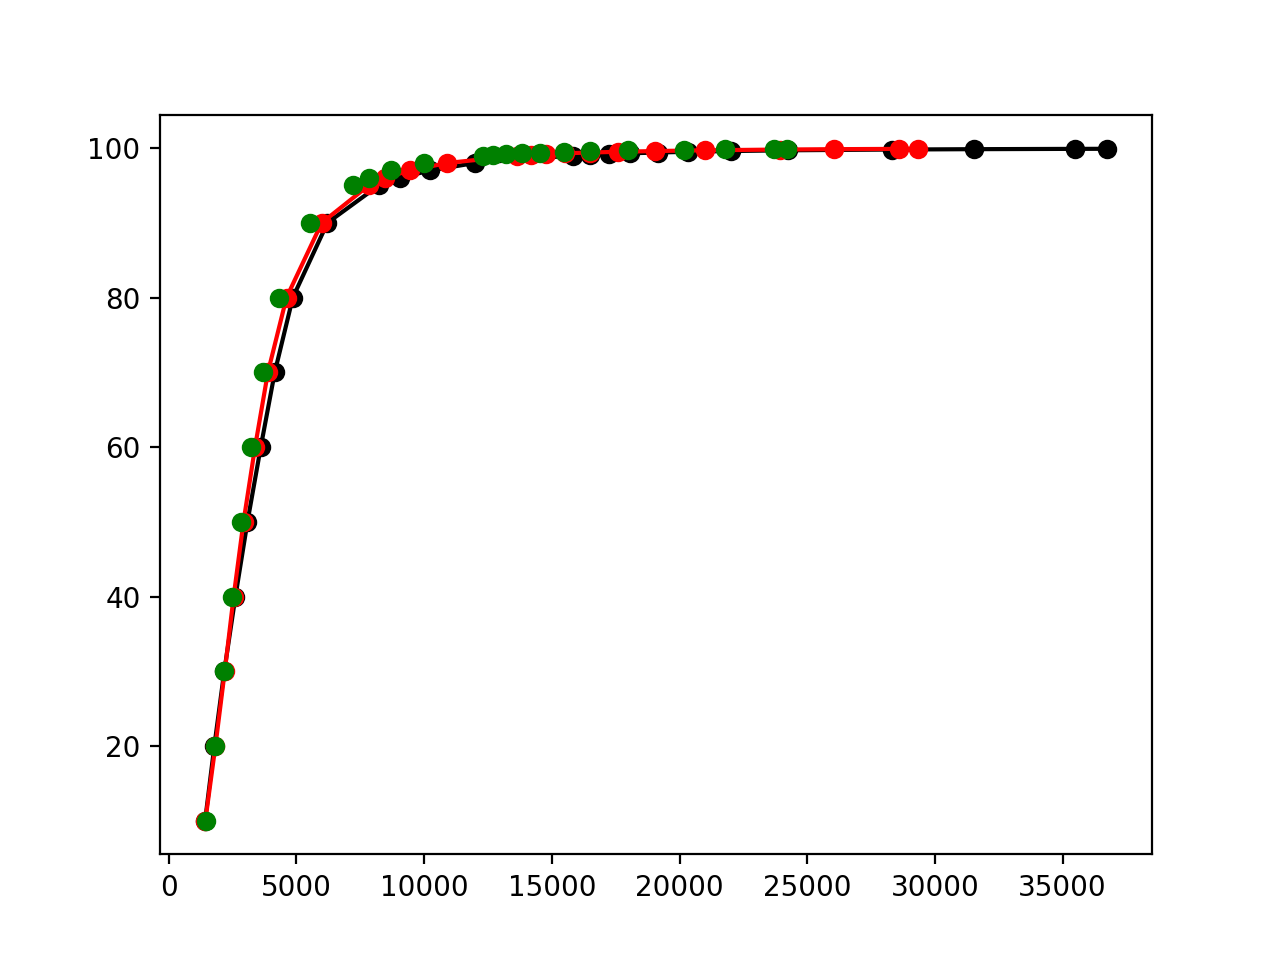

In [84]:
plt.plot(y_0, x_axis,'-ok', color="black")
# plt.plot(y_1,x_axis,'-or', color="red")
plt.plot(y_1,x_axis,'-og', color="red")
# plt.plot(y_10,x_axis,'-oc')
# plt.plot(y_20,x_axis,'-oy', color="green")
#plt.plot(y_30,x_axis,'k')
plt.plot(y_40,x_axis,'or', color="green")



plt.show()

In [98]:
import re
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

def get_timestamps(filename):
    file = open(filename, "r")
    lines = list(map(lambda line: line.rstrip('\n'), file.readlines()))

    # Remove everything before "Starting test"
    def get_line_with_find(lines, regex):
        for index, line in enumerate(lines):
            if line.find(regex) != -1:
                return index
        return -1


    body_index = get_line_with_find(lines, 'Starting test.')

    body = lines[body_index + 1:]
    
    # Get only data lines
    regex_pattern = re.compile(
        "^[0-9]{4}-(0[1-9]|1[0-2])-(0[1-9]|[1-2][0-9]|3[0-1]) (2[0-3]|[01][0-9]):[0-5][0-9]:[0-5][0-9]:[0-9]{3}")
    data_lines = list(filter(regex_pattern.match, body))

    # Get first and last line
    first_line = data_lines[0]
    last_line = data_lines[-1]

    # Parse the timestamps
    start_time_string = first_line.split()[0] + ' ' + first_line.split()[1][:12]
    end_time_string = last_line.split()[0] + ' ' + last_line.split()[1][:12]
    
    return (start_time_string, end_time_string)
    
def get_cassandra_metrics(filename):
    metrics_file = "_".join(filename.split("_")[:-1]) + "_metrics"
    
    files = list(map(lambda file: metrics_file + "/" + file,
                    filter(lambda file: 
                       file.startswith("Client1"),# and file.endswith("Client1"),
                       os.listdir(metrics_file + "/")
                    )))

    
#     print(files)
    
    metrics_df_node1 = pd.read_csv(files[1], parse_dates=True, infer_datetime_format=True, skipinitialspace=True)
    metrics_df_node1 = metrics_df_node1.dropna(axis='columns', how='all')
    
    
    start_time_string, end_time_string = get_timestamps(filename)
    in_benchmark = (metrics_df_node1['Timestamp'] > start_time_string) & (metrics_df_node1['Timestamp'] < end_time_string)
    metrics_df_node1 = metrics_df_node1[in_benchmark]
    
    metrics_df_node1['ReadThroughput'] = metrics_df_node1['ReadCount'] - metrics_df_node1['ReadCount'].shift(1)
    metrics_df_node1['WriteThroughput'] = metrics_df_node1['WriteCount'] - metrics_df_node1['WriteCount'].shift(1)

    metrics_df_node1 = metrics_df_node1.fillna(0)
    
    metrics_df_node1['SRDelay'][0] = 0


    return metrics_df_node1
    
    
metrics_df_node1 = get_cassandra_metrics(mixload_files[0])

metrics_df_node1
# mixload_files

/home/hannesr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Timestamp,MemoryUsed,ReadLatency1,ReadCount,WriteLatency1,WriteCount,PendingTasks,WaitingOnCommit1,SRDelay,ReadThroughput,WriteThroughput
0,2019-12-04 14:32:46.939,332199192,13.309584,745639,1.549308,42329,0,0.0,0,0.0,0.0
1,2019-12-04 14:32:47.991,342956448,13.309584,746014,1.549308,42348,0,0.0,74,375.0,19.0
2,2019-12-04 14:32:49.161,356727176,13.309584,746711,1.549308,42382,0,0.0,-57,697.0,34.0
3,2019-12-04 14:32:50.213,89172976,36.248075,747378,2.592784,42420,0,0.0,103,667.0,38.0
4,2019-12-04 14:32:51.244,102934712,36.248075,748058,2.592784,42450,0,0.0,8,680.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
311,2019-12-04 14:38:06.841,300472552,1283.509360,1139653,69.380824,63268,0,0.0,-150,1271.0,64.0
312,2019-12-04 14:38:07.865,317008160,1283.509360,1140430,69.380824,63301,0,0.0,92,777.0,33.0
313,2019-12-04 14:38:08.895,329420232,1283.509360,1140893,69.380824,63330,0,0.0,-38,463.0,29.0
314,2019-12-04 14:38:09.919,342083336,1253.837093,1141375,67.639325,63358,0,0.0,-6,482.0,28.0


0
315


<IPython.core.display.Javascript object>


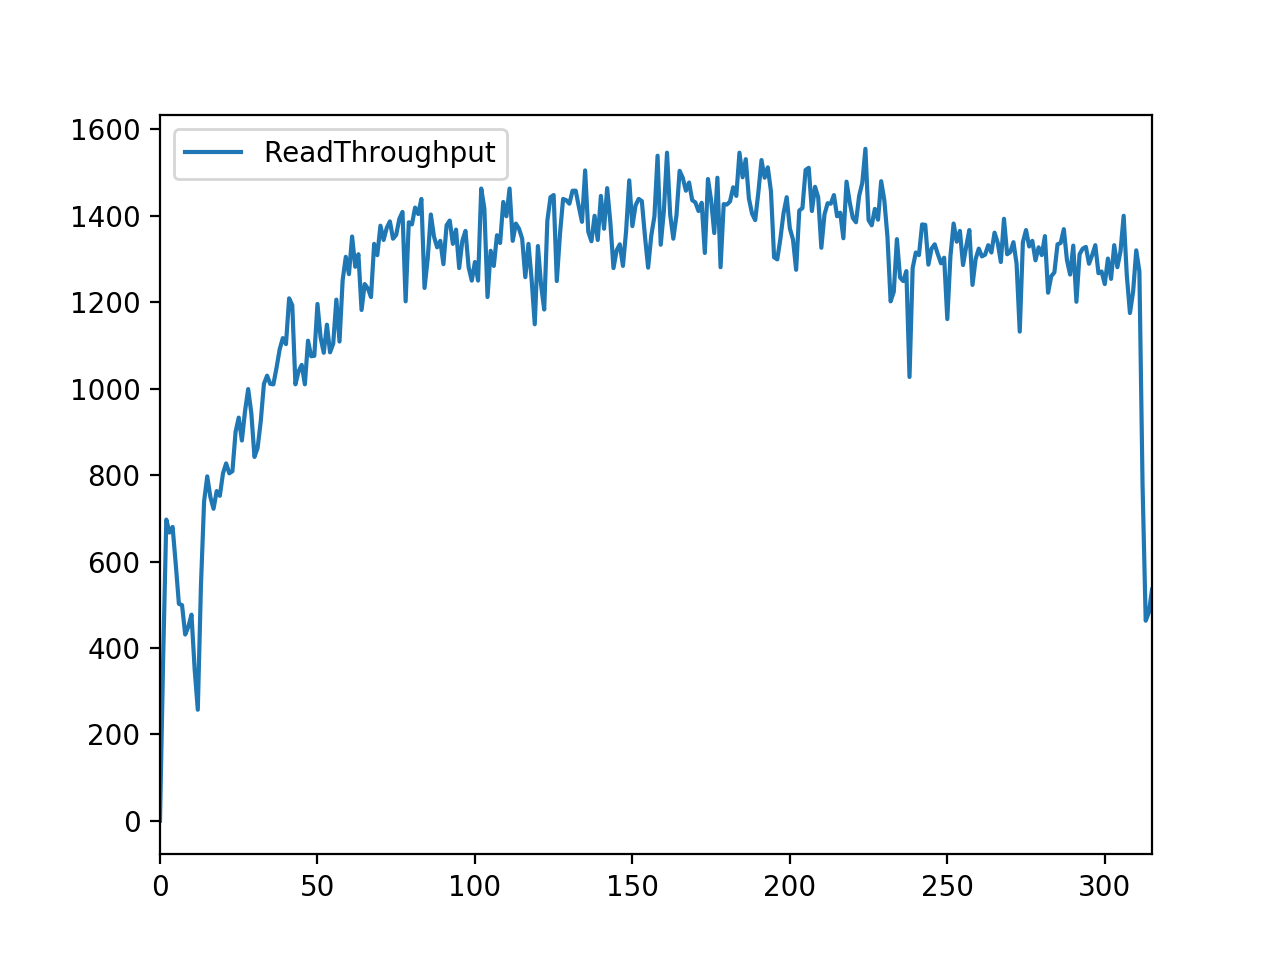

<IPython.core.display.Javascript object>


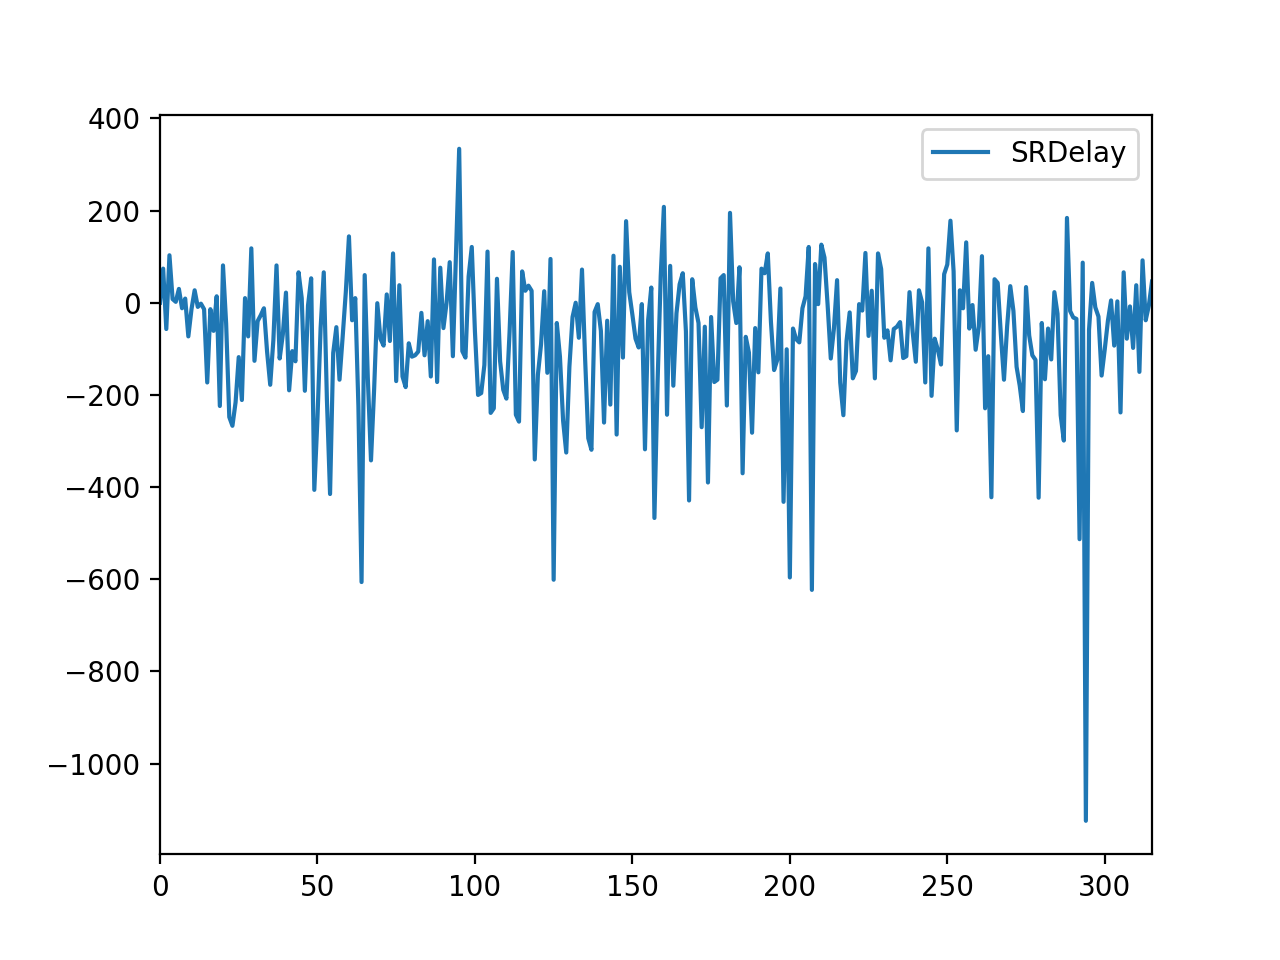

In [99]:
xmin = metrics_df_node1.index[0]
xmax = metrics_df_node1.index[-1]

print(xmin)
print(xmax)

ax = plt.gca()
metrics_df_node1.plot(kind='line', y='ReadThroughput')
metrics_df_node1.plot(kind='line', y='SRDelay')
plt.show()